In [1]:
# 📦 Install required libraries (run once per session)
!pip install pandas numpy matplotlib seaborn plotly scikit-learn geopandas folium missingno

# ✅ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# 🌍 Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 3)


In [22]:
DATA_PATH = "/content/Landslide_Factors.csv"

# Read the dataset
df = pd.read_csv(DATA_PATH)

# Display shape and first few rows
print("✅ Dataset Loaded:", DATA_PATH)
print("Shape:", df.shape)
display(df.head())


✅ Dataset Loaded: /content/Landslide_Factors.csv
Shape: (4295, 15)


,ID,LONG,LAT,SUB_Basin,Elevation,AAP(mm),RiverDIST(m),FaultDIST(m),Landuse_Type,Slop(Percent),Slop(Degrees),GEO_UNIT,DES_GEOUNI,Climate_Type,DES_ClimateType
0,1,52.326,27.763,Mehran,617.0,137,1448.705,40639.579,poorrange,42.241,22.900,EOas-ja,"Undivided Asmari and Jahrum Formation , regard...",A-M-VW,"Warm and humid, with a humid period longer tha..."
1,2,52.333,27.772,Mehran,944.0,137,344.299,40135.029,mix(woodland_x),68.219,34.301,KEpd-gu,Keewatin Epedotic quartz diorite,A-M-VW,"Warm and humid, with a humid period longer tha..."
2,3,52.326,27.763,Mehran,617.0,137,1448.705,40639.579,poorrange,42.241,22.900,EOas-ja,"Undivided Asmari and Jahrum Formation , regard...",A-M-VW,"Warm and humid, with a humid period longer tha..."
3,4,52.333,27.694,Mehran,55.0,137,1889.829,42189.544,rock,12.142,6.923,Mlmmi,Low weathering grey marls alternating with ba...,A-M-VW,"Warm and humid, with a humid period longer tha..."
4,5,52.324,27.682,Mehran,20.0,137,874.202,43010.084,poorrange,2.216,1.270,MuPlaj,"Brown to grey , calcareous , feature - formin...",A-M-VW,"Warm and humid, with a humid period longer tha..."


📘 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4295 entries, 0 to 4294
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4295 non-null   int64  
 1   LONG             4295 non-null   float64
 2   LAT              4295 non-null   float64
 3   SUB_Basin        4295 non-null   object 
 4   Elevation        4295 non-null   float64
 5   AAP(mm)          4295 non-null   int64  
 6   RiverDIST(m)     4295 non-null   float64
 7   FaultDIST(m)     4295 non-null   float64
 8   Landuse_Type     4295 non-null   object 
 9   Slop(Percent)    4295 non-null   float64
 10  Slop(Degrees)    4295 non-null   float64
 11  GEO_UNIT         4295 non-null   object 
 12  DES_GEOUNI       4295 non-null   object 
 13  Climate_Type     4295 non-null   object 
 14  DES_ClimateType  4295 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 503.4+ KB

📊 Descriptive Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4295.0,NaN,NaN,NaN,2148.0,1240.004,1.0,1074.5,2148.0,3221.5,4295.0
LONG,4295.0,NaN,NaN,NaN,50.992,3.354,44.302,48.433,50.499,53.191,61.792
LAT,4295.0,NaN,NaN,NaN,34.935,2.639,26.424,32.998,36.173,36.864,39.293
SUB_Basin,4295,65,Karun,593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elevation,4295.0,NaN,NaN,NaN,1391.112,673.859,0.0,860.5,1552.0,1902.5,3583.0
AAP(mm),4295.0,NaN,NaN,NaN,242.166,136.965,54.0,158.0,194.0,270.0,1142.0
RiverDIST(m),4295.0,NaN,NaN,NaN,809.248,974.939,0.066,208.199,526.187,1116.084,25656.226
FaultDIST(m),4295.0,NaN,NaN,NaN,5464.177,5920.571,1.122,1314.589,3486.627,7701.447,44108.087
Landuse_Type,4295,37,modrange,602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Slop(Percent),4295.0,NaN,NaN,NaN,23.084,15.484,0.0,11.534,20.419,31.4,100.0



🔍 Missing Values Summary:


,0
ID,0
LONG,0
LAT,0
SUB_Basin,0
Elevation,0
AAP(mm),0
RiverDIST(m),0
FaultDIST(m),0
Landuse_Type,0
Slop(Percent),0


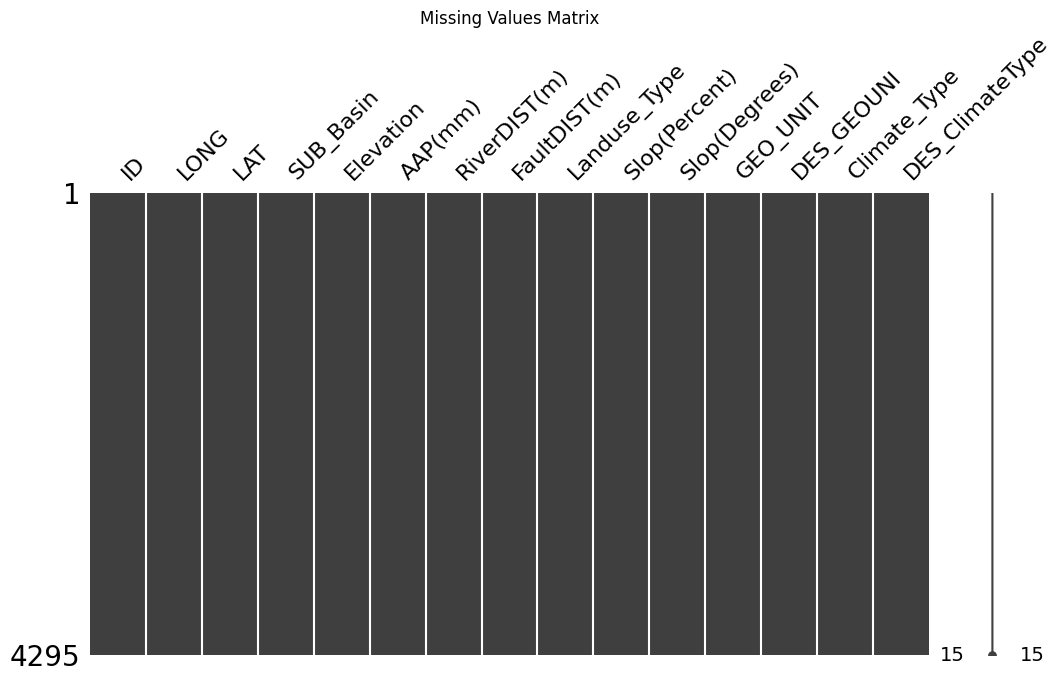

In [23]:
print("📘 Data Info:")
df.info()

print("\n📊 Descriptive Statistics:")
display(df.describe(include='all').transpose())

# Count missing values
print("\n🔍 Missing Values Summary:")
display(df.isnull().sum().sort_values(ascending=False))

# Visualize missing values
msno.matrix(df, figsize=(12,6))
plt.title("Missing Values Matrix")
plt.show()


In [24]:
# Duplicate rows
dup_count = df.duplicated().sum()
print(f"🔁 Duplicate rows: {dup_count}")

# Data types summary
dtype_summary = df.dtypes.value_counts()
print("\n🧩 Data Type Summary:")
print(dtype_summary)

# Convert datetime columns if found
for col in df.columns:
    if "date" in col.lower() or "time" in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

print("\n🕒 Datetime columns converted (if any).")


🔁 Duplicate rows: 0

🧩 Data Type Summary:
float64    7
object     6
int64      2
Name: count, dtype: int64

🕒 Datetime columns converted (if any).


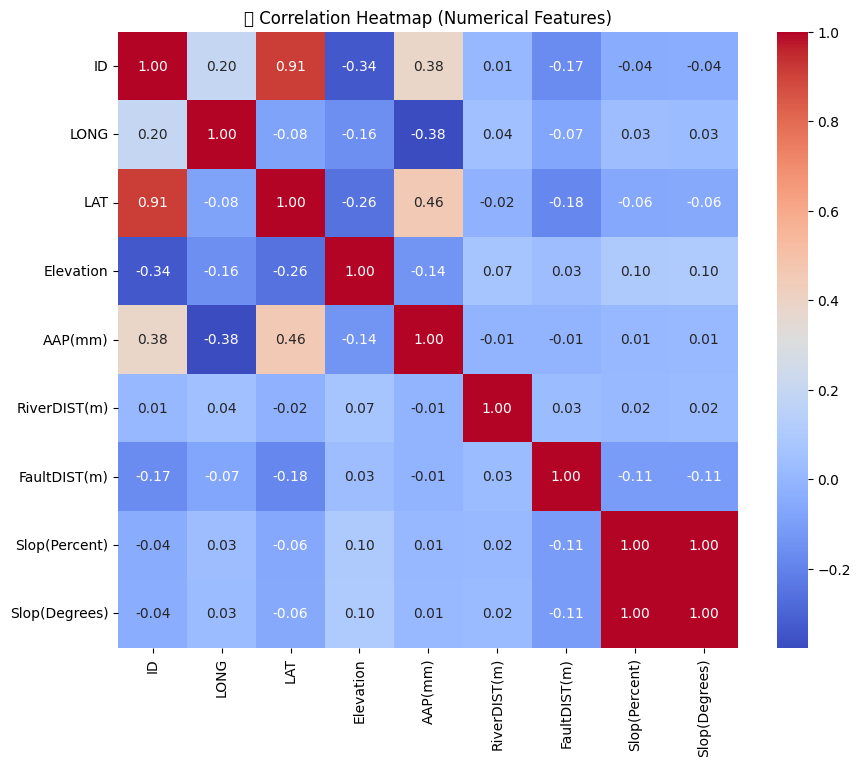

⚠️ No target column detected automatically. You can set one manually.


In [25]:
# Numeric correlations
num_df = df.select_dtypes(include=np.number)
corr = num_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("🔗 Correlation Heatmap (Numerical Features)")
plt.show()

# Top 5 correlated features with target (if target known)
target_col = None
for col in df.columns:
    if col.lower() in ['label', 'target', 'risk', 'risk_score', 'flood_risk', 'fire_risk']:
        target_col = col
        break

if target_col:
    print(f"🎯 Target Column detected: {target_col}")
    corr_target = corr[target_col].sort_values(ascending=False)
    display(corr_target.head(10))
else:
    print("⚠️ No target column detected automatically. You can set one manually.")


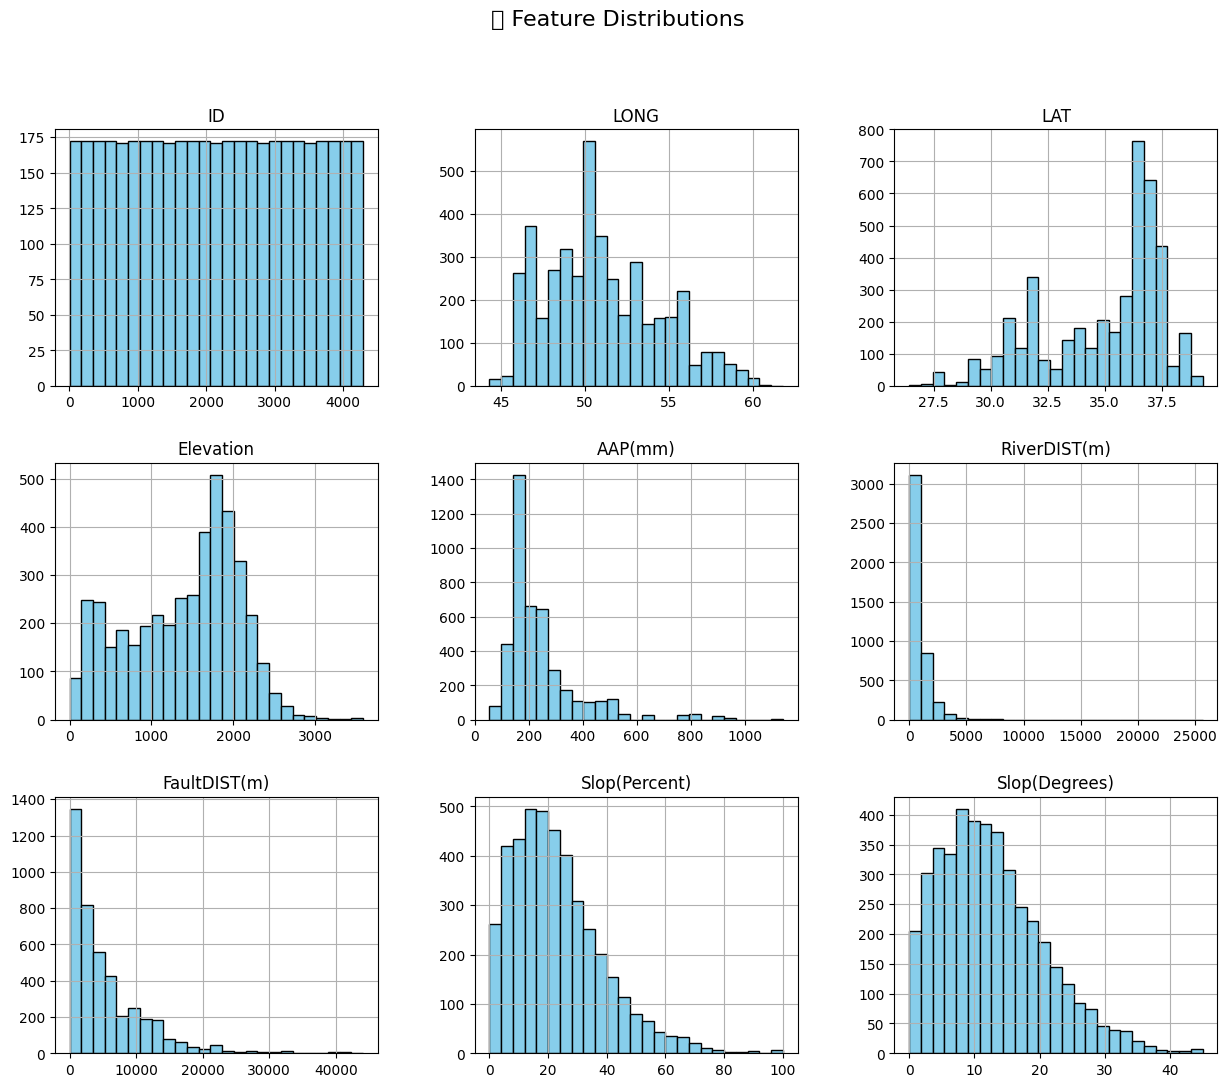

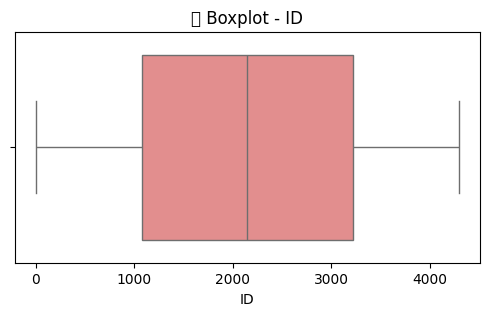

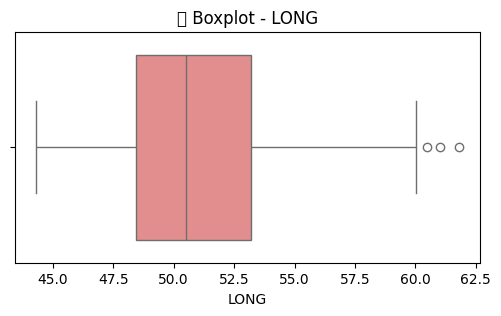

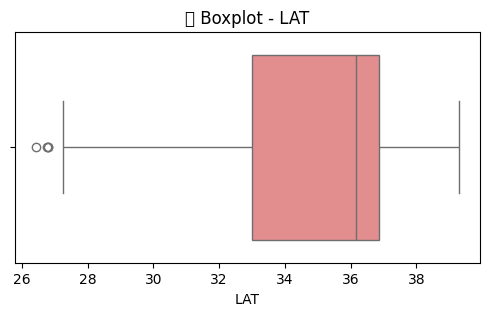

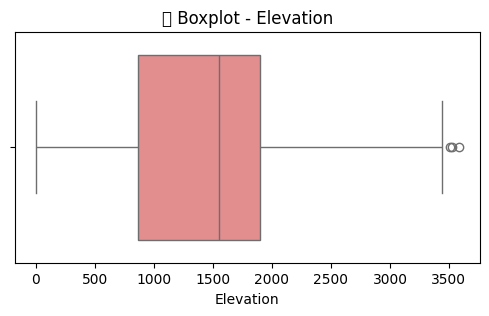

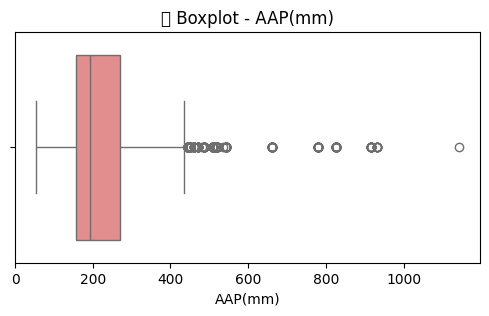

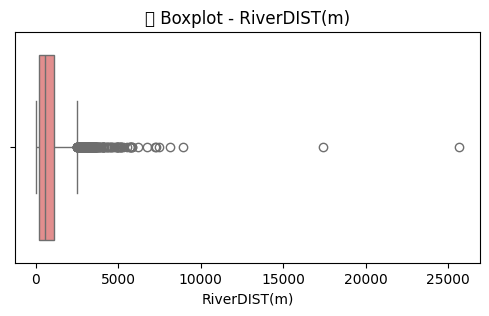

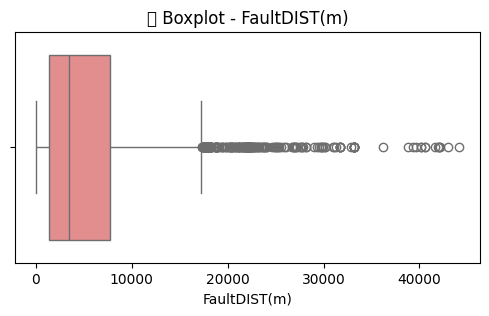

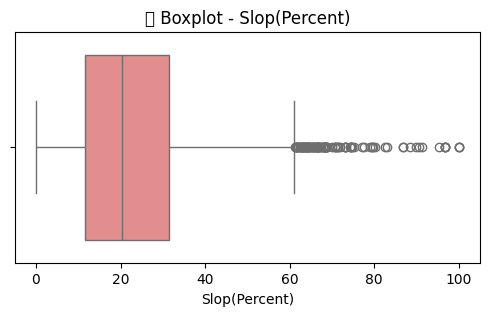

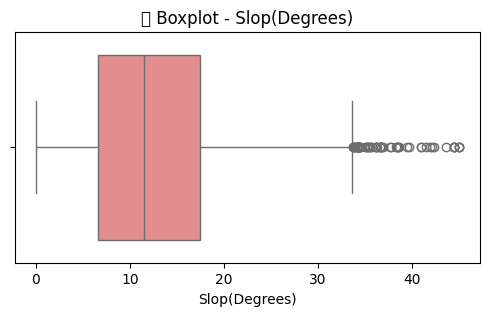

In [26]:
# Histograms for numeric columns
num_cols = num_df.columns.tolist()

df[num_cols].hist(bins=25, figsize=(15,12), color='skyblue', edgecolor='black')
plt.suptitle("📈 Feature Distributions", fontsize=16)
plt.show()

# Boxplots to detect outliers
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=col, color='lightcoral')
    plt.title(f"📦 Boxplot - {col}")
    plt.show()


In [27]:
from scipy import stats

# Detect and count outliers using Z-score
z = np.abs(stats.zscore(num_df, nan_policy='omit'))
outlier_count = (z > 3).sum(axis=0)
outlier_summary = pd.DataFrame({'Feature': num_df.columns, 'OutlierCount': outlier_count})
display(outlier_summary.sort_values('OutlierCount', ascending=False))


,Feature,OutlierCount
4,AAP(mm),115
6,FaultDIST(m),75
5,RiverDIST(m),51
7,Slop(Percent),41
8,Slop(Degrees),28
3,Elevation,4
2,LAT,4
1,LONG,1
0,ID,0


In [28]:
# Detect datetime column
time_col = None
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.datetime64):
        time_col = col
        break

if time_col:
    print(f"🕒 Time Column detected: {time_col}")
    plt.figure(figsize=(12,5))
    df.groupby(df[time_col].dt.to_period('M')).size().plot(kind='bar', color='teal')
    plt.title("📅 Monthly Observation Counts")
    plt.ylabel("Records")
    plt.show()
else:
    print("⚠️ No datetime column found.")


⚠️ No datetime column found.


In [29]:
if set(['latitude','longitude']).issubset(df.columns.str.lower()):
    print("🗺️ Creating map of dataset points...")
    lat_col = [c for c in df.columns if 'lat' in c.lower()][0]
    lon_col = [c for c in df.columns if 'lon' in c.lower()][0]

    m = folium.Map(location=[df[lat_col].mean(), df[lon_col].mean()], zoom_start=6)
    for _, row in df.sample(min(500, len(df))).iterrows():
        folium.CircleMarker(
            location=[row[lat_col], row[lon_col]],
            radius=2, color='red', fill=True
        ).add_to(m)
    display(m)
else:
    print("⚠️ No geographic coordinate columns detected.")


⚠️ No geographic coordinate columns detected.


In [30]:
# Quick feature importance using RandomForest (if target exists)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

if target_col:
    X = df.select_dtypes(include=np.number).drop(columns=[target_col])
    y = df[target_col]
    if len(y.unique()) <= 10:
        model = RandomForestClassifier()
    else:
        model = RandomForestRegressor()
    model.fit(X.fillna(0), y)
    imp = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    imp = imp.sort_values('Importance', ascending=False)
    px.bar(imp, x='Feature', y='Importance', title='🔥 Feature Importance').show()
else:
    print("Set `target_col` manually to compute feature importance.")


Set `target_col` manually to compute feature importance.


In [31]:
# Fill missing numeric values with median, encode categoricals
df_clean = df.copy()

for col in df_clean.select_dtypes(include=np.number).columns:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Encode categorical
for col in df_clean.select_dtypes(include='object').columns:
    if df_clean[col].nunique() < 30:
        df_clean[col] = LabelEncoder().fit_transform(df_clean[col].astype(str))

CLEAN_PATH = DATA_PATH.replace(".csv", "_cleaned.csv")
df_clean.to_csv(CLEAN_PATH, index=False)
print(f"✅ Cleaned data saved to: {CLEAN_PATH}")


✅ Cleaned data saved to: /content/Landslide_Factors_cleaned.csv


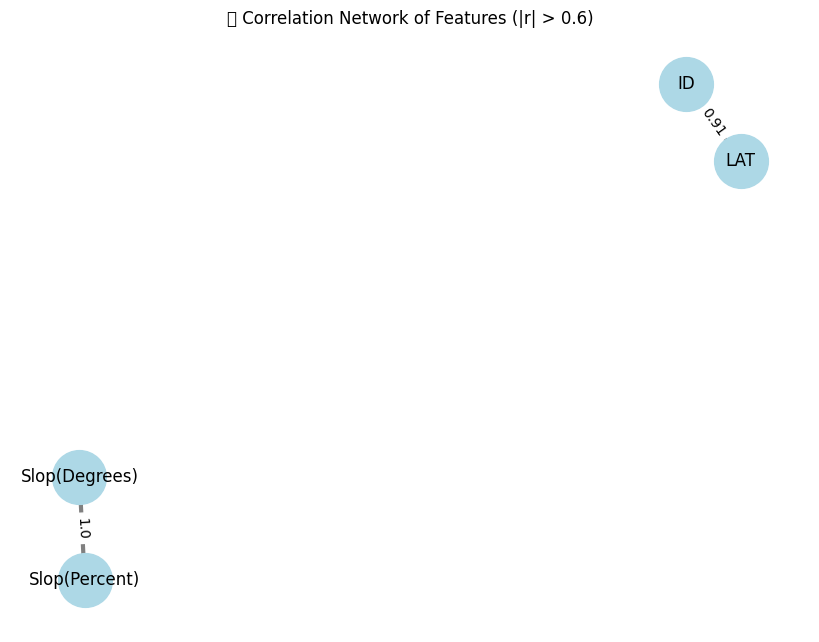

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=np.number).corr()
G = nx.Graph()

for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i, j]) > 0.6:
            G.add_edge(i, j, weight=round(corr.loc[i, j], 2))

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
weights = [abs(G[u][v]['weight'])*3 for u,v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', width=weights, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d['weight'] for u,v,d in G.edges(data=True)})
plt.title("🌐 Correlation Network of Features (|r| > 0.6)")
plt.show()


In [33]:
time_col = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]
if time_col:
    time_col = time_col[0]
    df[time_col] = pd.to_datetime(df[time_col])
    key_vars = [c for c in df.columns if c.lower() in ['rainfall_mm','temperature','humidity','river_level_m','ndvi']]
    if key_vars:
        fig = px.line(df.sort_values(time_col), x=time_col, y=key_vars,
                      title="📈 Temporal Trends of Key Parameters",
                      labels={'value':'Measurement','variable':'Feature'})
        fig.update_layout(template='plotly_white')
        fig.show()


In [34]:
if set(['latitude','longitude']).issubset(df.columns.str.lower()):
    lat_col = [c for c in df.columns if 'lat' in c.lower()][0]
    lon_col = [c for c in df.columns if 'lon' in c.lower()][0]
    value_col = None
    for col in df.columns:
        if 'risk' in col.lower() or 'score' in col.lower():
            value_col = col
            break

    if value_col:
        fig = px.density_mapbox(df, lat=lat_col, lon=lon_col, z=value_col,
                                radius=10, center=dict(lat=df[lat_col].mean(), lon=df[lon_col].mean()),
                                zoom=5, mapbox_style="stamen-terrain",
                                title=f"🔥 {value_col.upper()} Geospatial Heatmap")
        fig.show()


In [35]:
if target_col:
    top_corr = corr[target_col].sort_values(ascending=False).index[1:5]
    for col in top_corr:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=col, y=target_col, hue=target_col, palette='coolwarm')
        plt.title(f"💬 Relationship: {col} vs {target_col}")
        plt.show()


In [36]:
if target_col:
    df['risk_level'] = pd.cut(df[target_col], bins=[0,0.4,0.7,1], labels=['Low','Moderate','High'])
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='risk_level', palette=['#b3e6b3','#ffe680','#ff6666'])
    plt.title("🧭 Distribution of Risk Levels")
    plt.xlabel("Risk Category")
    plt.ylabel("Count")
    plt.show()


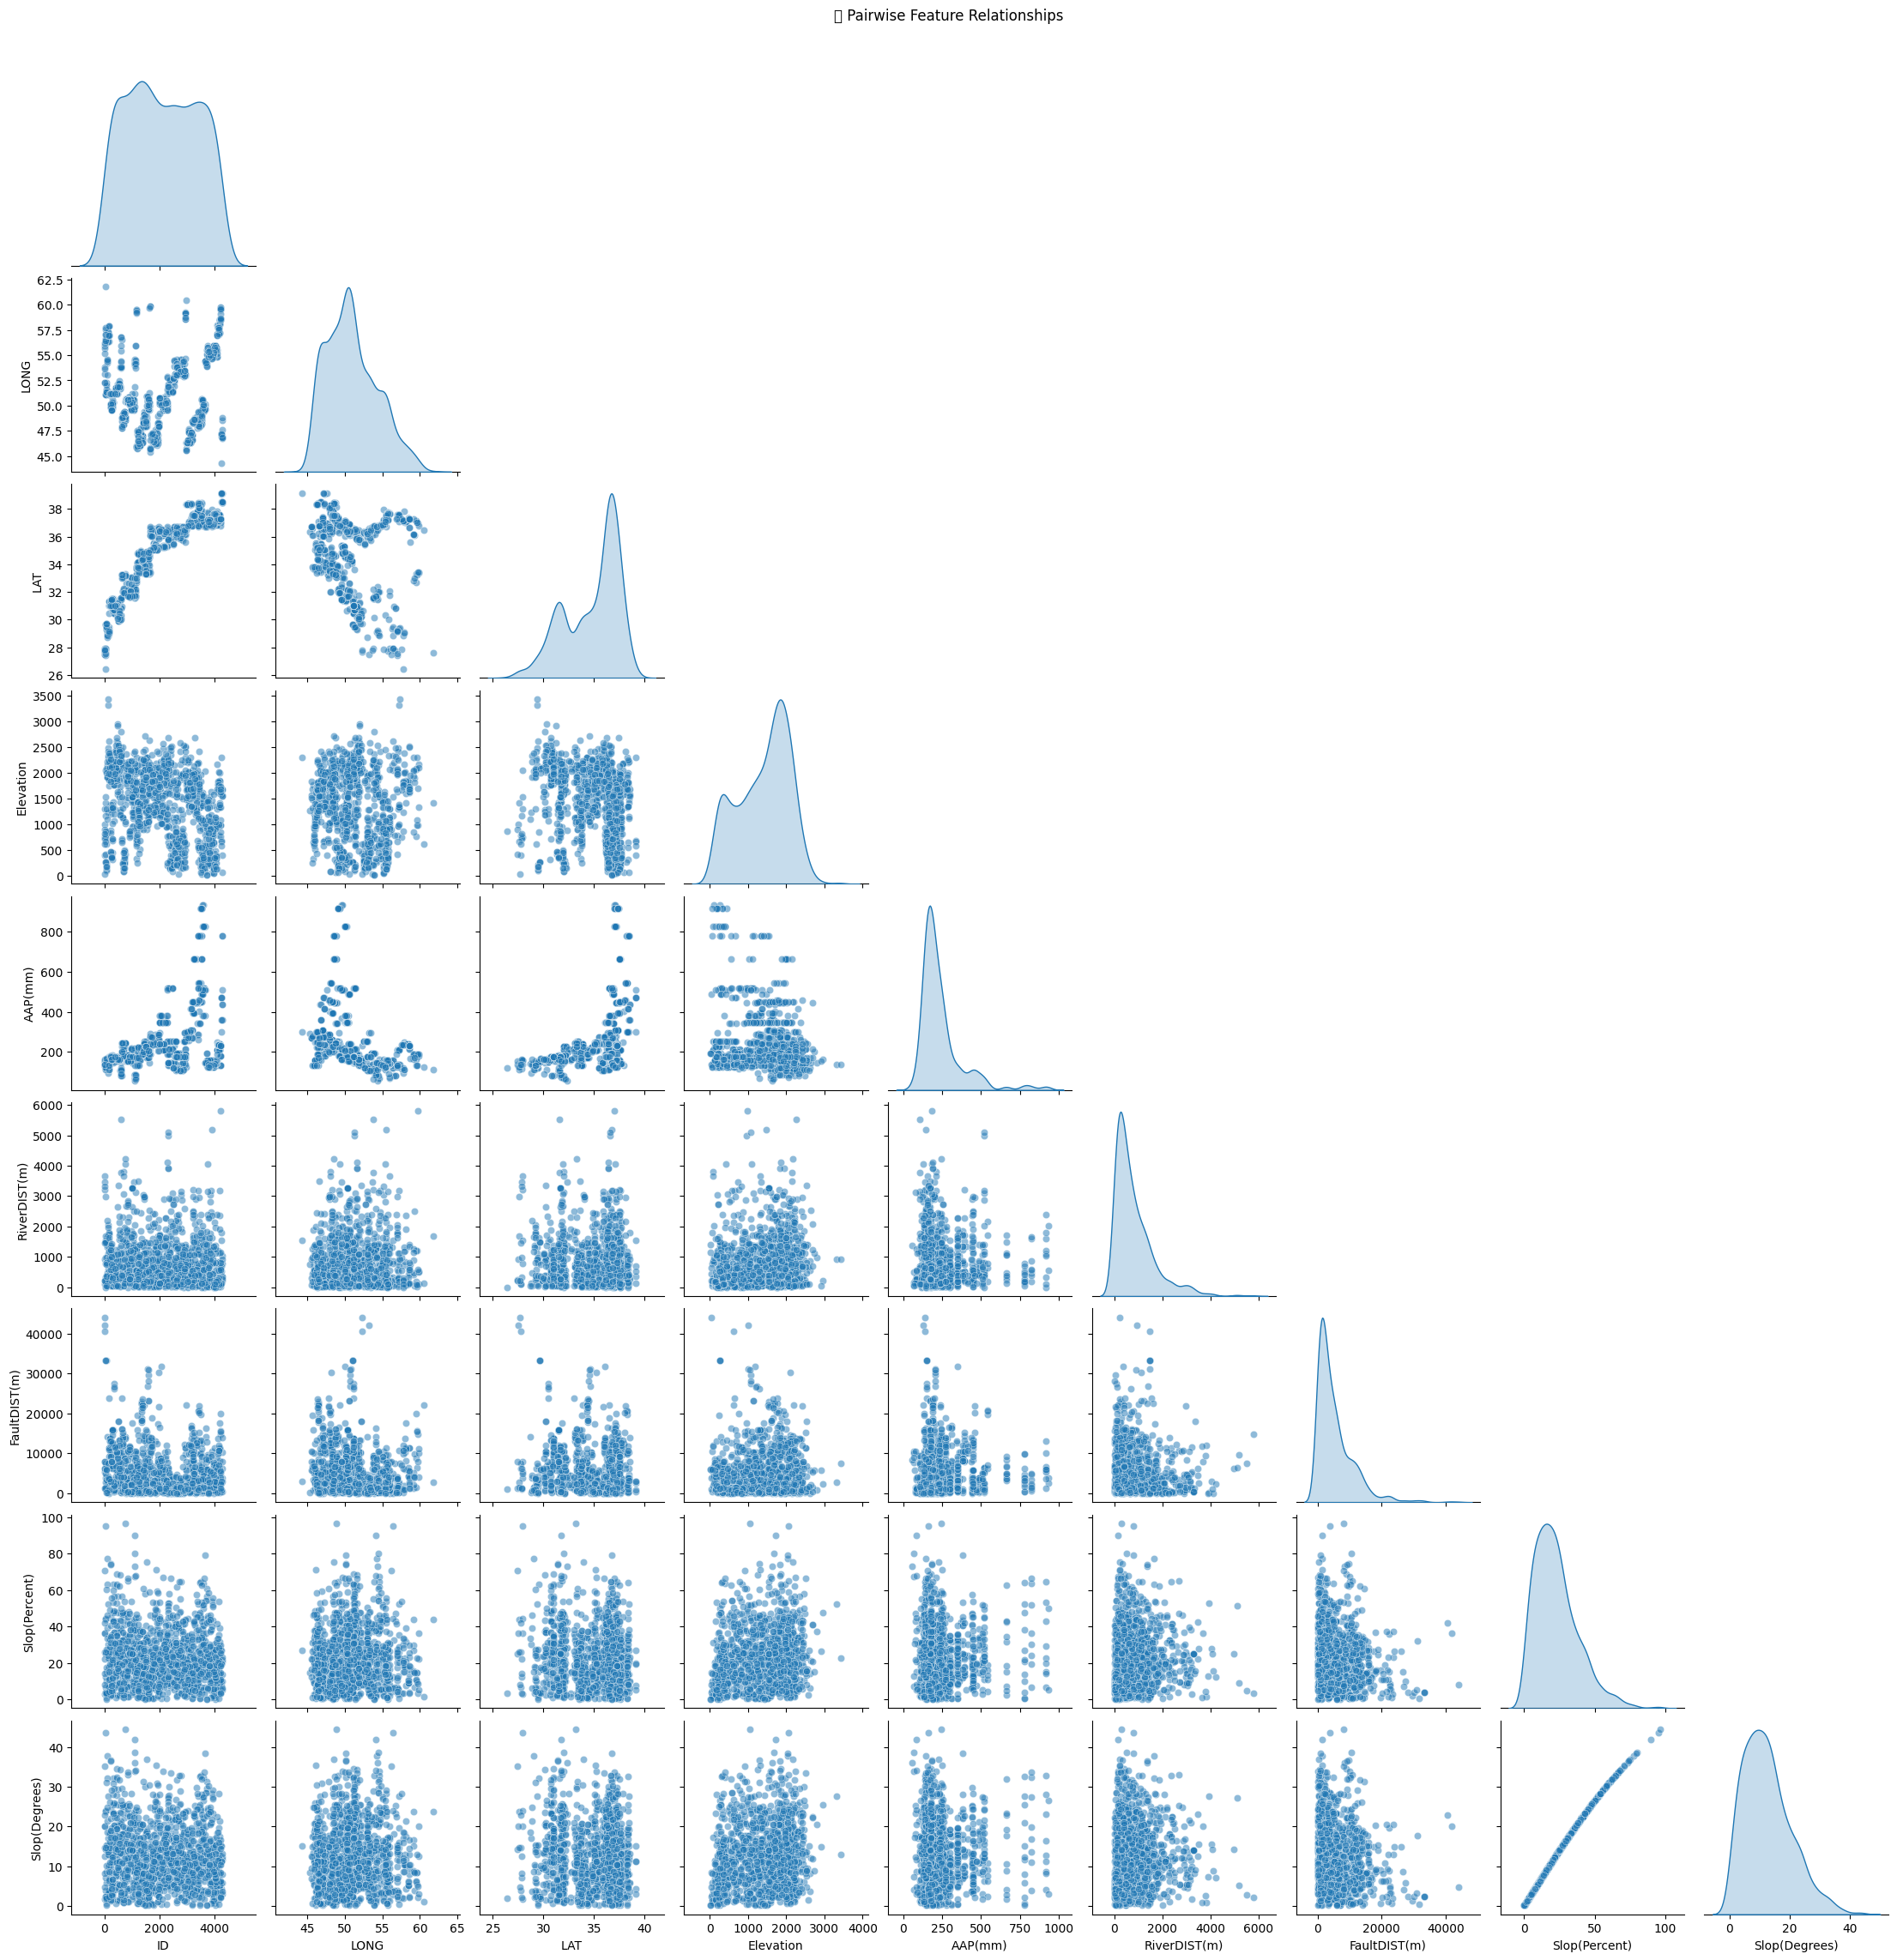

In [37]:
subset = df.select_dtypes(include=np.number).sample(frac=0.3, random_state=42)
sns.pairplot(subset, diag_kind='kde', corner=True, plot_kws={'alpha':0.5})
plt.suptitle("🔍 Pairwise Feature Relationships", y=1.02)
plt.show()


In [38]:
if time_col:
    df['year'] = df[time_col].dt.year
    df['month'] = df[time_col].dt.month
    pivot = df.pivot_table(index='month', columns='year', values='rainfall_mm', aggfunc='mean')
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f")
    plt.title("🌦️ Monthly Average Rainfall by Year")
    plt.ylabel("Month")
    plt.xlabel("Year")
    plt.show()


In [39]:
if 'fire_risk' in df.columns or 'hotspots' in df.columns:
    val_col = 'fire_risk' if 'fire_risk' in df.columns else 'hotspots'
    plt.figure(figsize=(10,5))
    sns.kdeplot(df[val_col], fill=True, color='orange', bw_adjust=0.3)
    plt.title("🔥 Fire Risk Density Distribution")
    plt.xlabel(val_col)
    plt.show()


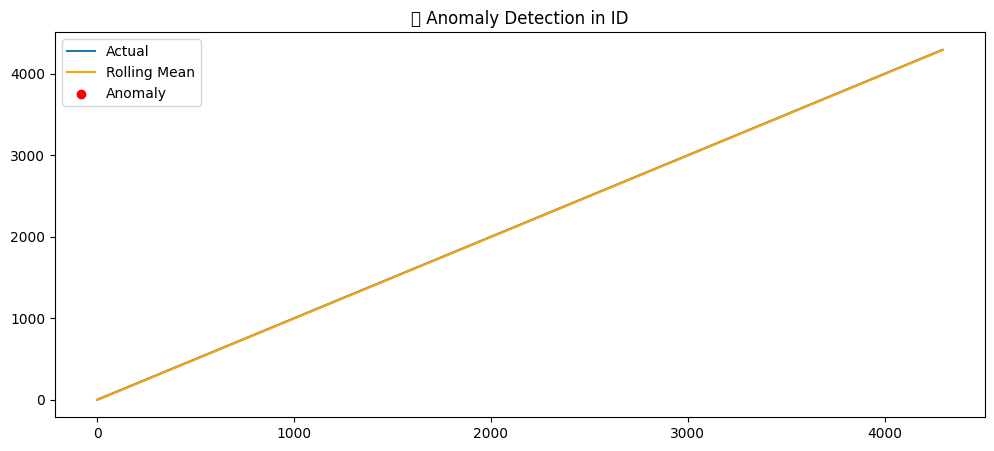

In [40]:
col = 'rainfall_mm' if 'rainfall_mm' in df.columns else df.select_dtypes(include=np.number).columns[0]
df['rolling_mean'] = df[col].rolling(window=10, min_periods=1).mean()
df['anomaly'] = np.abs(df[col] - df['rolling_mean']) > 3 * df[col].std()

plt.figure(figsize=(12,5))
plt.plot(df[col], label='Actual')
plt.plot(df['rolling_mean'], label='Rolling Mean', color='orange')
plt.scatter(df.index[df['anomaly']], df[col][df['anomaly']], color='red', label='Anomaly')
plt.title(f"🚨 Anomaly Detection in {col}")
plt.legend()
plt.show()
